In [5]:
# Preview where Python thinks you are
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_results_analysis


In [6]:
from pathlib import Path

# Automatically get the base path of your project
base_path = Path.cwd().parents[0]  # adjust .parents[0] if needed
print("Base path of the project:", base_path)

Base path of the project: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db


In [7]:
import pandas as pd

# === Config ===
# Path to your DB search PSM file (genus-level analysis)
psm_path = base_path /"db_psm_results/Peaks_export/YA_RZ_GW_SHMX_DB_analysis_genus_db/DB search psm genus.csv"

# Recommended threshold for high confidence PSMs
default_threshold = 30  # corresponds to p = 0.001

df = pd.read_csv(psm_path)
display(df.head())

,Peptide,-10lgP,Mass,Length,ppm,m/z,Z,RT,Area,Fraction,Id,Scan,from Chimera,Source File,Accession,PTM,AScore,Found By
0,LGEHNIDVLEGNEQFINAAK,137.28,2210.0967,20,2.3,1106.0581,2,119.72,754000.0,1,51390,41166,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB
1,LGEHNIDVLEGNEQFINAAK,86.81,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,51404,41372,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB
2,LGEHNIDVLEGNEQFINAAK,73.77,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,51403,41083,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB
3,KVQAAQYVASHPGEVC(+57.02)PAK,129.57,2039.0258,19,0.0,680.6825,3,58.97,5418600.0,1,18330,16658,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935P...,Carbamidomethylation,C16:Carbamidomethylation:1000.00,PEAKS DB
4,KVQAAQYVASHPGEVC(+57.02)PAK,72.19,2039.0258,19,0.6,510.7640,4,58.97,5364300.0,1,18334,16626,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935P...,Carbamidomethylation,C16:Carbamidomethylation:1000.00,PEAKS DB


In [8]:
def filter_psms_by_score(filepath, score_threshold=default_threshold):
    """
    Load the PSM table and filter based on -10lgP threshold.

    Args:
        filepath (str): Path to the CSV file.
        score_threshold (float): Minimum -10lgP score to retain a match.

    Returns:
        pd.DataFrame: Filtered PSM DataFrame.
    """
    print(f"🔍 Loading PSM data from: {filepath}")
    df = pd.read_csv(filepath)

    # Sanity check
    if "-10lgP" not in df.columns:
        raise ValueError("Column '-10lgP' not found in the input file.")

    print(f"📊 Total matches before filtering: {len(df)}")

    # Apply threshold
    filtered_df = df[df["-10lgP"] >= score_threshold].reset_index(drop=True)

    print(f"✅ Matches after filtering (≥ {score_threshold}): {len(filtered_df)}")
    return filtered_df

# === Run the filter with the default threshold
filtered_psms = filter_psms_by_score(psm_path)


🔍 Loading PSM data from: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_psm_results\Peaks_export\YA_RZ_GW_SHMX_DB_analysis_genus_db\DB search psm genus.csv
📊 Total matches before filtering: 6335
✅ Matches after filtering (≥ 30): 6335


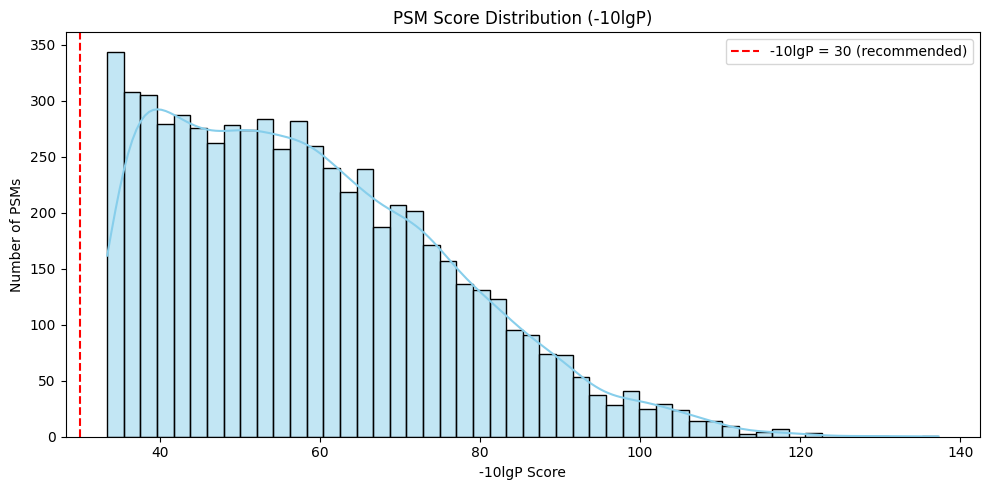

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_score_distribution(df, score_column="-10lgP", bins=50):
    """
    Plot distribution of PSM scores.

    Args:
        df (pd.DataFrame): PSM DataFrame.
        score_column (str): Column with the PSM score (usually -10lgP).
        bins (int): Number of histogram bins.
    """
    if score_column not in df.columns:
        raise ValueError(f"'{score_column}' not found in DataFrame.")

    plt.figure(figsize=(10, 5))
    sns.histplot(df[score_column], bins=bins, kde=True, color="skyblue")
    plt.axvline(30, color="red", linestyle="--", label="-10lgP = 30 (recommended)")
    plt.title("PSM Score Distribution (-10lgP)")
    plt.xlabel("-10lgP Score")
    plt.ylabel("Number of PSMs")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Plot for your filtered or unfiltered DataFrame
plot_score_distribution(filtered_psms)  # or replace with full df if desired

In [10]:
# === Basic peptide count metrics ===
total_psms = len(df)
unique_peptides = df["Peptide"].nunique()

print(f"🔢 Total PSMs: {total_psms}")
print(f"🧬 Unique peptides: {unique_peptides}")

# === Optional: peptide counts per protein accession ===
peptides_per_protein = df.groupby("Accession")["Peptide"].nunique().sort_values(ascending=False)
print("\n📦 Peptide counts per protein (top 10):")
print(peptides_per_protein.head(10))


🔢 Total PSMs: 6335
🧬 Unique peptides: 4235

📦 Peptide counts per protein (top 10):
Accession
A0A369XUD3|A0A369XUD3_9PROT                                23
A0A369XNQ7|A0A369XNQ7_9PROT                                23
W6M2M4|W6M2M4_9GAMM                                        22
W6M0L7|W6M0L7_9GAMM                                        21
W6MA33|W6MA33_9GAMM                                        21
A0A6A7RN62|A0A6A7RN62_9PROT:A0A011PVG8|A0A011PVG8_9PROT    17
A0A3E1DIP8|A0A3E1DIP8_9PROT                                16
A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT    16
W6M8F3|W6M8F3_9GAMM                                        16
W6MDZ3|W6MDZ3_9GAMM                                        15
Name: Peptide, dtype: int64


In [11]:
from Bio import SeqIO
from IPython.display import display
import re

# === Parse your FASTA file to get accession-to-organism map ===
fasta_path = base_path / "fasta_proteomes/session_2025-05-12_00-46-46/custom_database_genus.fasta"
accession_to_taxa = {}

for record in SeqIO.parse(fasta_path, "fasta"):
    header = record.description
    match = re.search(r"OS=(.+?)(?: OX=| GN=| PE=| SV=|$)", header)
    if match:
        taxon = match.group(1).strip()
    else:
        taxon = "Unknown"
    
    for acc in record.id.split("|"):
        accession_to_taxa[acc.strip()] = taxon

# === Function to extract taxa for each accession entry ===
def extract_taxa(accession_str):
    if pd.isna(accession_str):
        return ""
    taxa_found = []
    seen = set()
    for block in accession_str.split(":"):
        for acc in block.split("|"):
            acc = acc.strip()
            taxon = accession_to_taxa.get(acc, "NA")
            if taxon not in seen:
                seen.add(taxon)
                taxa_found.append(taxon)
    return ", ".join(taxa_found)

# === Construct new dataframe with taxa column ===
df_with_taxa = df[["Peptide", "Accession"]].copy()
df_with_taxa["Taxon names"] = df_with_taxa["Accession"].apply(extract_taxa)

# === Display output cleanly ===
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

display(df_with_taxa.head(15))


,Peptide,Accession,Taxon names
0,LGEHNIDVLEGNEQFINAAK,NaN,
1,LGEHNIDVLEGNEQFINAAK,NaN,
2,LGEHNIDVLEGNEQFINAAK,NaN,
3,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935PZZ1_9PROT:A0A369XKK9|A0A369XKK9_9PROT:A0A080MBD7|A0A080MBD7_9PROT,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus"
4,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935PZZ1_9PROT:A0A369XKK9|A0A369XKK9_9PROT:A0A080MBD7|A0A080MBD7_9PROT,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus"
5,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis
6,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis
7,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis
8,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis
9,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis


In [12]:
import pandas as pd
from Bio import Entrez
import time
from IPython.display import display

# Email required for NCBI Entrez access
Entrez.email = "your_email@example.com"

# === Function: Get Taxon ID from a single scientific name ===
def get_taxid_from_name(name):
    try:
        handle = Entrez.esearch(db="taxonomy", term=name.strip(), retmode="xml")
        records = Entrez.read(handle)
        handle.close()
        if records["IdList"]:
            return records["IdList"][0]
        else:
            return "NA"
    except Exception as e:
        print(f"❌ Error for '{name}': {e}")
        return "NA"

# === Caching mechanism to speed up repeated queries ===
taxid_cache = {}

# === Vectorized function to extract all taxon IDs per row ===
def extract_taxids(taxon_str):
    if pd.isna(taxon_str):
        return ""
    names = [n.strip() for n in taxon_str.split(",") if n.strip()]  # strip whitespace
    taxids = []
    for name in names:
        if name in taxid_cache:
            taxids.append(taxid_cache[name])
        else:
            taxid = get_taxid_from_name(name)
            taxid_cache[name] = taxid
            taxids.append(taxid)
            time.sleep(0.35)  # respect NCBI rate limit
    return ", ".join(taxids)

# === Apply the function ===
df_with_taxa["Taxon IDs"] = df_with_taxa["Taxon names"].apply(extract_taxids)

# === Preview final result ===
display(df_with_taxa[["Peptide", "Accession", "Taxon names", "Taxon IDs"]].head(15))

,Peptide,Accession,Taxon names,Taxon IDs
0,LGEHNIDVLEGNEQFINAAK,NaN,,
1,LGEHNIDVLEGNEQFINAAK,NaN,,
2,LGEHNIDVLEGNEQFINAAK,NaN,,
3,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935PZZ1_9PROT:A0A369XKK9|A0A369XKK9_9PROT:A0A080MBD7|A0A080MBD7_9PROT,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383"
4,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935PZZ1_9PROT:A0A369XKK9|A0A369XKK9_9PROT:A0A080MBD7|A0A080MBD7_9PROT,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383"
5,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160
6,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160
7,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160
8,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160
9,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160


In [13]:
import requests
import pandas as pd

# === Define corrected UniPept LCA fetch function ===
def get_lca_and_rank(taxon_ids_str):
    try:
        # Parse and clean taxon ID string
        taxon_ids = [tid.strip().strip("\"'") for tid in taxon_ids_str.split(",") if tid.strip()]
        
        # Skip empty input
        if not taxon_ids:
            return pd.Series(["NA", "NA"])

        # If only one ID, treat that taxon itself as the LCA
        if len(taxon_ids) == 1:
            return pd.Series([taxon_ids[0], "exact match"])

        # Build the UniPept API URL
        params = "&".join([f"input[]={tid}" for tid in taxon_ids])
        url = f"https://api.unipept.ugent.be/api/v2/taxa2lca.json?{params}&extra=true"
        
        # Query the API
        response = requests.get(url)
        response.raise_for_status()
        result = response.json()

        # Parse taxon name and rank, based on type
        if isinstance(result, dict):  # Correct for multi-input cases
            return pd.Series([result.get("taxon_name", "NA"), result.get("taxon_rank", "NA")])
        elif isinstance(result, list) and result:
            return pd.Series([result[0].get("taxon_name", "NA"), result[0].get("taxon_rank", "NA")])
        else:
            return pd.Series(["NA", "NA"])

    except Exception as e:
        print(f"❌ Error retrieving LCA for taxon IDs {taxon_ids}: {e}")
        return pd.Series(["NA", "NA"])

# === Apply function to dataframe ===
df_with_lca = df_with_taxa.copy()
df_with_lca[["lca", "lca rank"]] = df_with_lca["Taxon IDs"].dropna().apply(get_lca_and_rank)

# === Show preview ===
display(df_with_lca[["Peptide", "Accession", "Taxon names", "Taxon IDs", "lca", "lca rank"]].head(15))



,Peptide,Accession,Taxon names,Taxon IDs,lca,lca rank
0,LGEHNIDVLEGNEQFINAAK,NaN,,,NA,NA
1,LGEHNIDVLEGNEQFINAAK,NaN,,,NA,NA
2,LGEHNIDVLEGNEQFINAAK,NaN,,,NA,NA
3,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935PZZ1_9PROT:A0A369XKK9|A0A369XKK9_9PROT:A0A080MBD7|A0A080MBD7_9PROT,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
4,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935PZZ1_9PROT:A0A369XKK9|A0A369XKK9_9PROT:A0A080MBD7|A0A080MBD7_9PROT,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
5,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160,327160,exact match
6,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160,327160,exact match
7,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160,327160,exact match
8,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160,327160,exact match
9,YGVGANYANGPINVDLVYQGR,A0A6A7RR07|A0A6A7RR07_9PROT:A0A369XSR1|A0A369XSR1_9PROT,Candidatus Accumulibacter phosphatis,327160,327160,exact match


In [14]:
# Update LCA name for rows with a single taxon ID (skip rows with ',' or empty/NA)
def update_lca_name_if_single(row):
    taxid = row.get("Taxon IDs", "")
    if isinstance(taxid, str) and "," not in taxid and taxid.strip() and taxid.strip().upper() != "NA":
        return row.get("Taxon names", row["lca"])  # use taxon name if available
    return row["lca"]  # keep existing lca for multiple IDs

# Apply to df_with_lca
df_with_lca["lca"] = df_with_lca.apply(update_lca_name_if_single, axis=1)
display(df_with_lca[["Peptide", "Taxon names", "Taxon IDs", "lca", "lca rank"]].head(15))

,Peptide,Taxon names,Taxon IDs,lca,lca rank
0,LGEHNIDVLEGNEQFINAAK,,,NA,NA
1,LGEHNIDVLEGNEQFINAAK,,,NA,NA
2,LGEHNIDVLEGNEQFINAAK,,,NA,NA
3,KVQAAQYVASHPGEVC(+57.02)PAK,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
4,KVQAAQYVASHPGEVC(+57.02)PAK,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
5,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,exact match
6,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,exact match
7,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,exact match
8,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,exact match
9,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,exact match


In [15]:
import requests
import pandas as pd

# Make a copy
df_with_final_ranks = df_with_lca.copy()

# Function to fetch rank from UniPept taxa2tree
def fetch_rank_from_taxa2tree(taxon_id):
    try:
        # Validate input
        if not taxon_id or not taxon_id.strip().isdigit():
            raise ValueError("Invalid taxon ID")

        url = "https://api.unipept.ugent.be/api/v2/taxa2tree.json"
        params = {"input[]": taxon_id}
        response = requests.get(url, params=params)
        response.raise_for_status()
        result = response.json()

        # Recursively search tree for matching taxon ID
        def find_node_rank(node):
            if isinstance(node, dict):
                if node.get("id") == int(taxon_id):
                    return node.get("rank", "NA")
                for child in node.get("children", []):
                    rank = find_node_rank(child)
                    if rank:
                        return rank
            return None

        return find_node_rank(result) or "NA"

    except Exception as e:
        print(f"❌ Error retrieving rank for taxon ID {taxon_id!r}: {e}")
        return "NA"

# Update only valid single-ID rows
def update_rank_if_single(row):
    taxid = row.get("Taxon IDs", "").strip()
    # Only apply if it's a single, valid numeric ID
    if isinstance(taxid, str) and "," not in taxid and taxid.isdigit():
        return fetch_rank_from_taxa2tree(taxid)
    return row["lca rank"]  # Keep existing value (already filled or NA)

# Apply
df_with_final_ranks["lca rank"] = df_with_final_ranks.apply(update_rank_if_single, axis=1)

# Preview
display(df_with_final_ranks[["Peptide", "Taxon names", "Taxon IDs", "lca", "lca rank"]].head(15))




❌ Error retrieving rank for taxon ID '327160': 503 Server Error: Service Unavailable for url: https://api.unipept.ugent.be/api/v2/taxa2tree.json?input%5B%5D=327160
❌ Error retrieving rank for taxon ID '327160': 503 Server Error: Service Unavailable for url: https://api.unipept.ugent.be/api/v2/taxa2tree.json?input%5B%5D=327160
❌ Error retrieving rank for taxon ID '327160': 503 Server Error: Service Unavailable for url: https://api.unipept.ugent.be/api/v2/taxa2tree.json?input%5B%5D=327160
❌ Error retrieving rank for taxon ID '327160': 503 Server Error: Service Unavailable for url: https://api.unipept.ugent.be/api/v2/taxa2tree.json?input%5B%5D=327160
❌ Error retrieving rank for taxon ID '327160': 503 Server Error: Service Unavailable for url: https://api.unipept.ugent.be/api/v2/taxa2tree.json?input%5B%5D=327160
❌ Error retrieving rank for taxon ID '327160': 503 Server Error: Service Unavailable for url: https://api.unipept.ugent.be/api/v2/taxa2tree.json?input%5B%5D=327160
❌ Error retrievi

,Peptide,Taxon names,Taxon IDs,lca,lca rank
0,LGEHNIDVLEGNEQFINAAK,,,NA,NA
1,LGEHNIDVLEGNEQFINAAK,,,NA,NA
2,LGEHNIDVLEGNEQFINAAK,,,NA,NA
3,KVQAAQYVASHPGEVC(+57.02)PAK,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
4,KVQAAQYVASHPGEVC(+57.02)PAK,"Candidatus Accumulibacter appositus, Candidatus Accumulibacter proximus, Candidatus Accumulibacter phosphatis, Candidatus Accumulibacter cognatus","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
5,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,species
6,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,species
7,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,species
8,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,species
9,YGVGANYANGPINVDLVYQGR,Candidatus Accumulibacter phosphatis,327160,Candidatus Accumulibacter phosphatis,species


In [16]:
display(df_with_final_ranks.shape)

(6335, 6)

In [17]:
# Count how many rows have a non-empty, valid Taxon ID
has_taxon_id = df_with_final_ranks["Taxon IDs"].apply(lambda x: isinstance(x, str) and x.strip() != "" and x.strip().upper() != "NA")
n_with_taxon_id = has_taxon_id.sum()

# Count how many rows have a valid (non-NA) lca rank
has_lca_rank = df_with_final_ranks["lca rank"].apply(lambda x: isinstance(x, str) and x.strip().upper() != "NA")
n_with_lca_rank = has_lca_rank.sum()

# Total number of rows
total_rows = len(df_with_final_ranks)

# Display summary
print(f"Taxonomic summary:")
print(f"- Total rows: {total_rows}")
print(f"- Rows with Taxon ID: {n_with_taxon_id}")
print(f"- Rows with LCA rank: {n_with_lca_rank}")
print(f"- % with Taxon ID: {n_with_taxon_id / total_rows:.2%}")
print(f"- % with LCA rank: {n_with_lca_rank / total_rows:.2%}")


Taxonomic summary:
- Total rows: 6335
- Rows with Taxon ID: 6103
- Rows with LCA rank: 6074
- % with Taxon ID: 96.34%
- % with LCA rank: 95.88%


In [18]:
# Define the rank levels you want to inspect
ranks_of_interest = ["strain", "species", "genus", "family"]

# Count how many rows (PSMs) fall under each rank
rank_counts = df_with_final_ranks["lca rank"].value_counts()

# Extract only the ranks you're interested in
psm_counts_per_rank = {rank: rank_counts.get(rank, 0) for rank in ranks_of_interest}

# Print a summary
print("Number of PSMs per taxonomic rank:")
for rank, count in psm_counts_per_rank.items():
    print(f"- {rank.title()}: {count} PSMs")

Number of PSMs per taxonomic rank:
- Strain: 661 PSMs
- Species: 3125 PSMs
- Genus: 1638 PSMs
- Family: 0 PSMs


C:\Temp\ipykernel_20412\1537326249.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(rel_abundance))


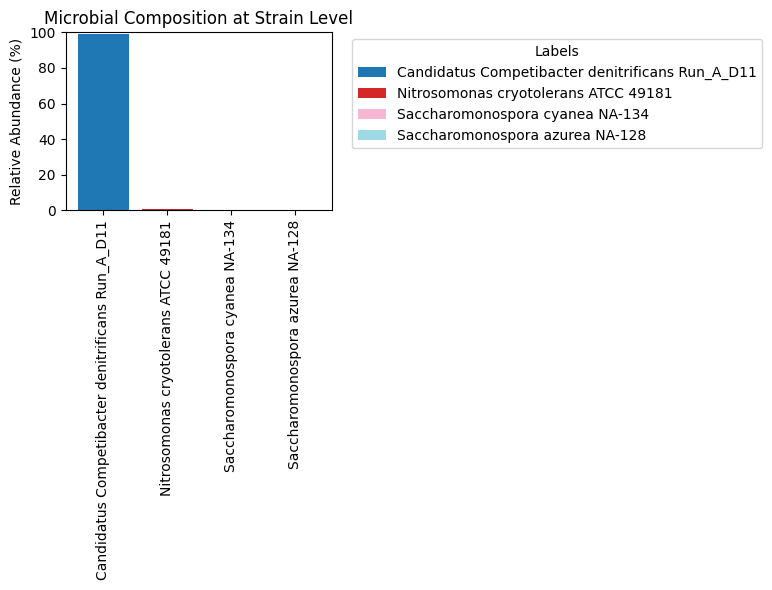

C:\Temp\ipykernel_20412\1537326249.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(rel_abundance))
C:\Temp\ipykernel_20412\1537326249.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


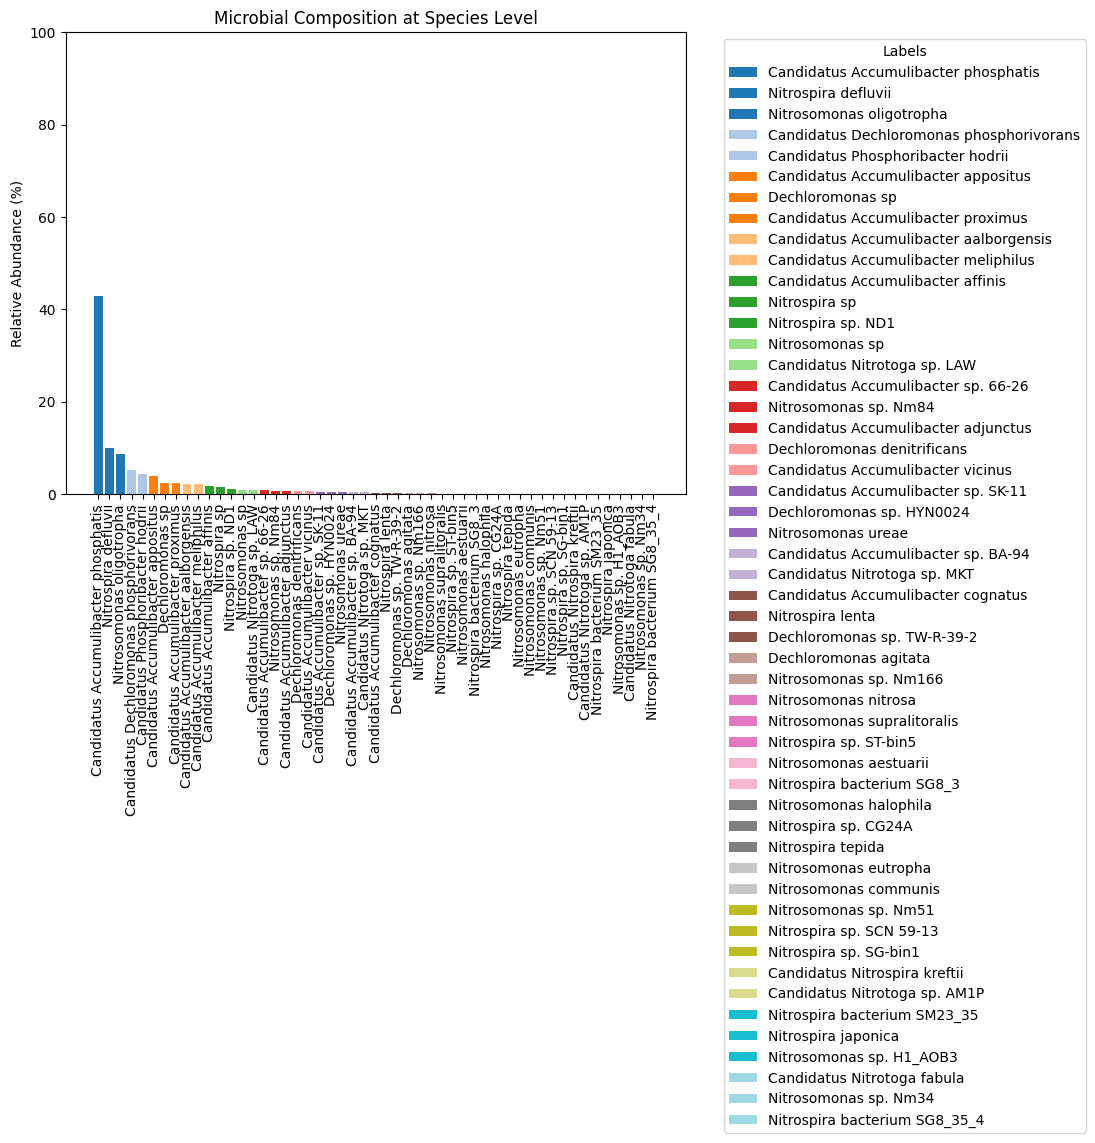

C:\Temp\ipykernel_20412\1537326249.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(rel_abundance))


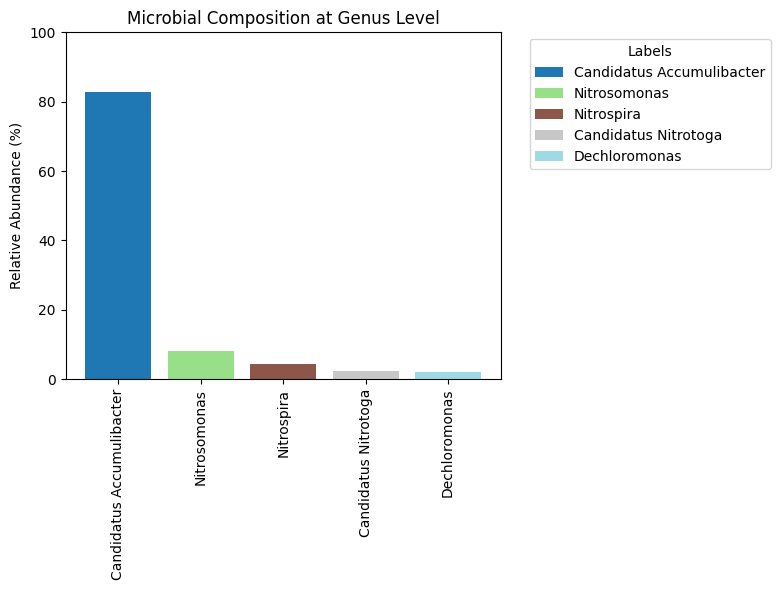

⚠️ No data for rank: family


In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Ranks to visualize
ranks_to_plot = ["strain", "species", "genus", "family"]

for rank in ranks_to_plot:
    # Filter PSMs for this rank
    rank_df = df_with_final_ranks[df_with_final_ranks["lca rank"] == rank]

    if rank_df.empty:
        print(f"⚠️ No data for rank: {rank}")
        continue

    # Count and normalize taxa
    taxon_counts = rank_df["lca"].value_counts()
    rel_abundance = (taxon_counts / taxon_counts.sum()) * 100
    rel_abundance = rel_abundance.sort_values(ascending=False)

    # Generate unique colors for each bar
    cmap = cm.get_cmap('tab20', len(rel_abundance))
    colors = [cmap(i) for i in range(len(rel_abundance))]

    # Plot
    plt.figure(figsize=(8, 6))
    bars = plt.bar(rel_abundance.index, rel_abundance.values, color=colors)

    # Plot formatting
    plt.xticks(rotation=90)
    plt.ylabel("Relative Abundance (%)")
    plt.title(f"Microbial Composition at {rank.title()} Level")
    plt.ylim(0, 100)

    # Add legend
    plt.legend(bars, rel_abundance.index, title="Labels", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()




### Comparison of Taxonomic Profiles: De Novo vs. PSM-Based

Interestingly, the microbial composition based on matched peptide spectrum matches (PSMs) revealed **more species** than the earlier de novo peptide-based analysis, yet **fewer genera**.

This likely reflects the impact of the **custom protein database filtering strategy**. The database was constructed by selecting proteins based on their genus-level annotations, which limits the number of genera detectable post-database. However, within each retained genus, the FASTA headers often still contain **species-level annotations**, allowing finer taxonomic resolution during downstream mapping.

In contrast, the de novo-based approach (e.g., via UniPept) likely explored a **broader range of genera** — including low-abundance or low-confidence matches — resulting in **greater genus-level diversity** but less certainty at finer resolutions.

Thus, the observed difference suggests that PSM-based profiles are **more taxonomically precise** (especially at the species level) but **constrained by the original database scope**, particularly at higher taxonomic ranks.

For future iterations, using a broader taxonomic filter (e.g., including families or all genera above a certain confidence) may help preserve community diversity while retaining annotation depth.


### Should Microbial Composition Be Area-Weighted?

While peptide-spectrum match (PSM) counts provide a basic estimate of microbial presence, they do not reflect the **abundance** or **intensity** of those peptides. By weighting taxa by the **chromatographic area** of their matched peptides, we obtain a more **quantitative estimate of taxon abundance**.

This approach accounts for both the number and intensity of matched peptides, offering a closer proxy to actual protein expression or biomass contributions. Therefore, area-weighted microbial profiles can be considered more biologically meaningful than simple PSM counts.

In [20]:
# Sanity check: Are both dataframes aligned row-by-row?
assert df_with_final_ranks.shape[0] == df.shape[0], "Mismatch in rows! Cannot align safely."

# Copy the original taxonomic dataframe
df_ranks_with_area = df_with_final_ranks.copy()

# Directly assign the Area column from df (same order assumed)
df_ranks_with_area["Area"] = df["Area"].values

# Check result
print("✅ Successfully aligned Area values row-by-row.")
display(df_ranks_with_area.shape)
display(df_ranks_with_area[["Peptide", "Area"]].head(10))


✅ Successfully aligned Area values row-by-row.


(6335, 7)

,Peptide,Area
0,LGEHNIDVLEGNEQFINAAK,754000.0
1,LGEHNIDVLEGNEQFINAAK,18576000.0
2,LGEHNIDVLEGNEQFINAAK,18576000.0
3,KVQAAQYVASHPGEVC(+57.02)PAK,5418600.0
4,KVQAAQYVASHPGEVC(+57.02)PAK,5364300.0
5,YGVGANYANGPINVDLVYQGR,12892000.0
6,YGVGANYANGPINVDLVYQGR,12892000.0
7,YGVGANYANGPINVDLVYQGR,12892000.0
8,YGVGANYANGPINVDLVYQGR,12892000.0
9,YGVGANYANGPINVDLVYQGR,12892000.0


C:\Temp\ipykernel_20412\408833064.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(rel_abundance))


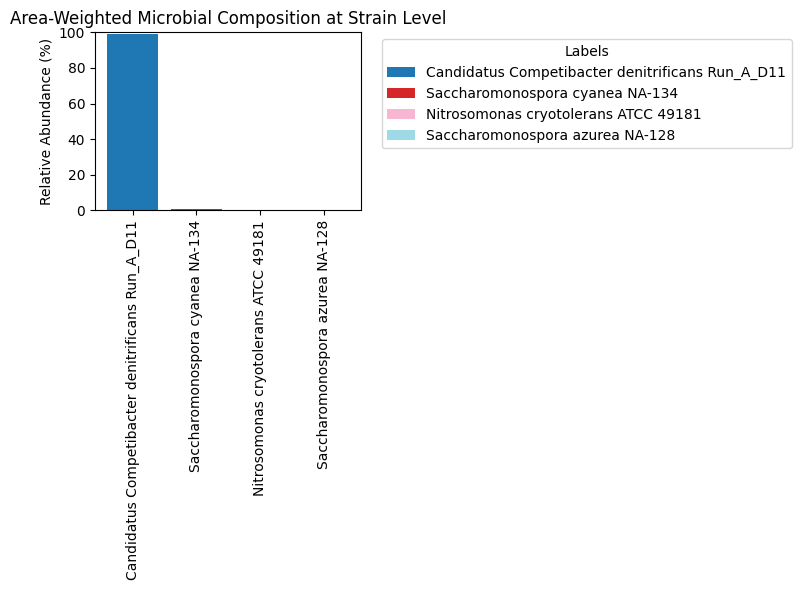

C:\Temp\ipykernel_20412\408833064.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(rel_abundance))
C:\Temp\ipykernel_20412\408833064.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


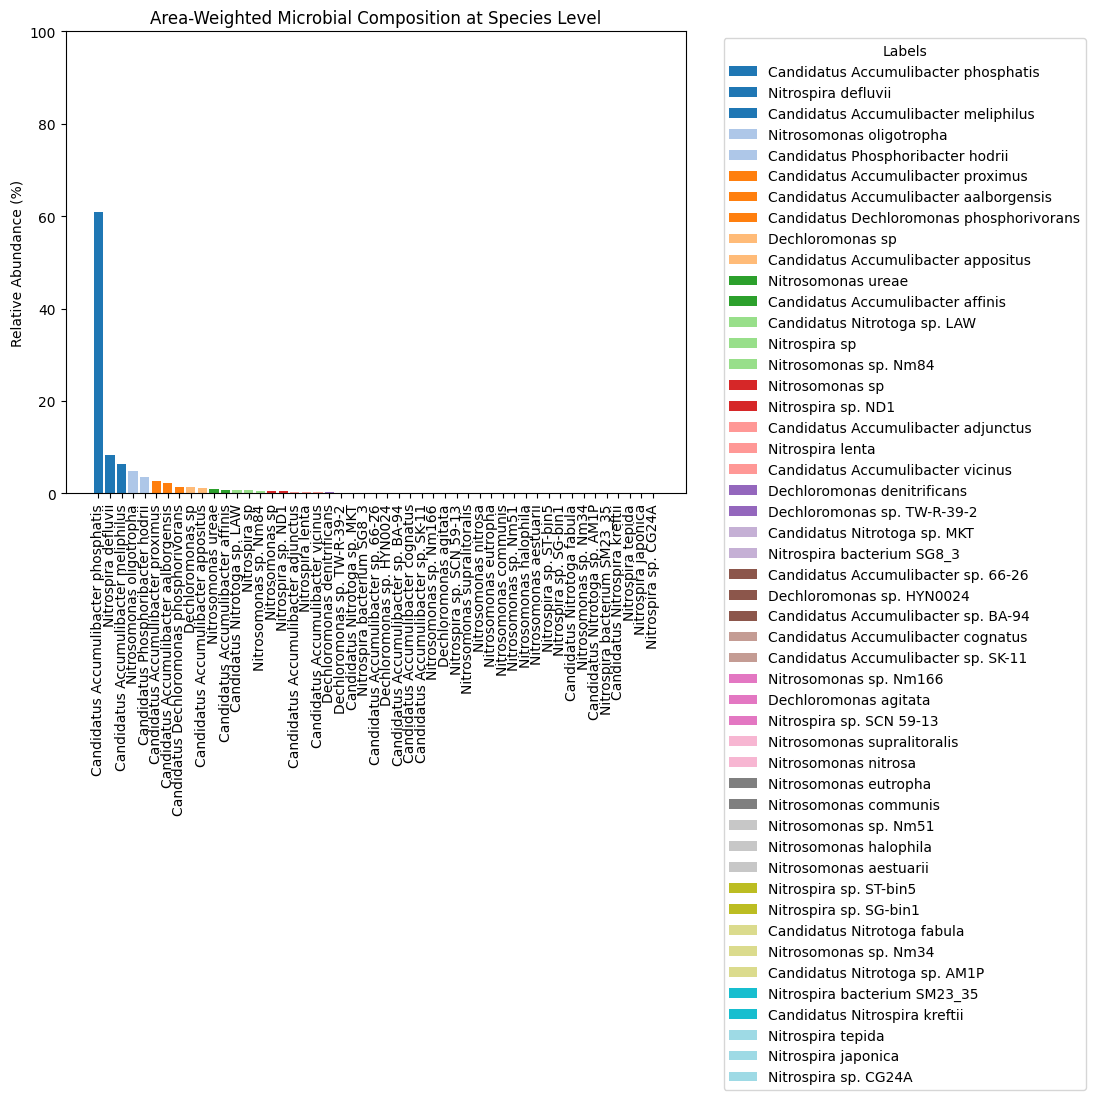

C:\Temp\ipykernel_20412\408833064.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(rel_abundance))


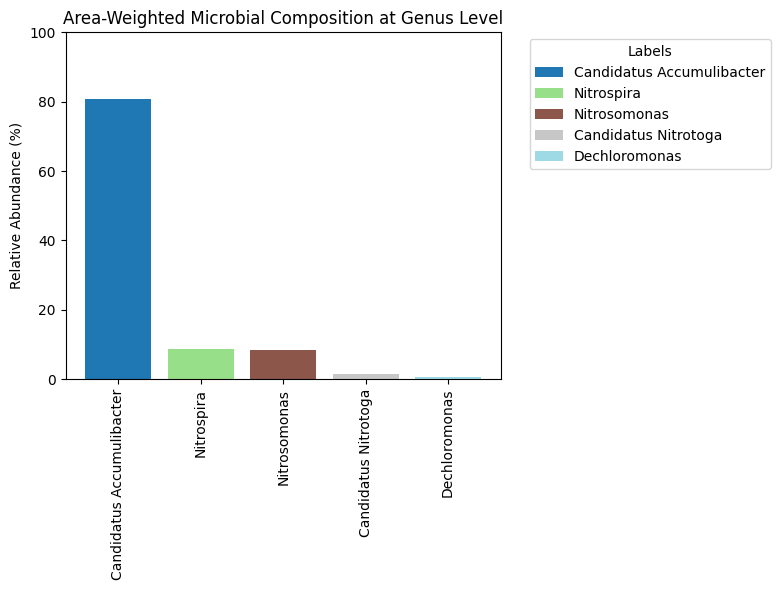

⚠️ No area data or no PSMs for rank: family


In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Ranks to visualize
ranks_to_plot = ["strain", "species", "genus", "family"]

for rank in ranks_to_plot:
    # Filter PSMs with this rank
    rank_df = df_ranks_with_area[df_ranks_with_area["lca rank"] == rank]

    if rank_df.empty or "Area" not in rank_df.columns:
        print(f"⚠️ No area data or no PSMs for rank: {rank}")
        continue

    # Group by LCA taxon name and sum area values
    taxon_abundance = rank_df.groupby("lca")["Area"].sum()
    taxon_abundance = taxon_abundance[taxon_abundance > 0]  # remove zero areas
    rel_abundance = (taxon_abundance / taxon_abundance.sum()) * 100
    rel_abundance = rel_abundance.sort_values(ascending=False)

    # Generate unique colors
    cmap = cm.get_cmap('tab20', len(rel_abundance))
    colors = [cmap(i) for i in range(len(rel_abundance))]

    # Plot
    plt.figure(figsize=(8, 6))
    bars = plt.bar(rel_abundance.index, rel_abundance.values, color=colors)

    plt.xticks(rotation=90)
    plt.ylabel("Relative Abundance (%)")
    plt.title(f"Area-Weighted Microbial Composition at {rank.title()} Level")
    plt.ylim(0, 100)
    plt.legend(bars, rel_abundance.index, title="Labels", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()


### Comparison of Microbial Community Composition: Unweighted vs. Area-Weighted

#### Overview
To accurately interpret the microbial composition of the sample, we compared two approaches:

1. **Unweighted Composition** – based purely on the frequency of peptide-spectrum matches (PSMs) associated with each taxon in the `df_with_final_ranks` dataframe.
2. **Area-Weighted Composition** – based on the summed ion intensity (*Area*) values per taxon, which account for the abundance of the detected peptides.

Both methods were applied across four taxonomic ranks: **strain**, **species**, **genus**, and **family**. Below we discuss the key findings and differences observed in the results.

---

#### Key Observations

##### **1. Strain Level**
- **Unweighted**: Candidatus *Competibacter denitrificans Run_A_D11* dominated the community by count, with minimal representation of other strains.
- **Area-Weighted**: The dominance of *Competibacter denitrificans* became even more pronounced (>90%), while low-abundance strains were further diminished.
- **Conclusion**: Ion intensity confirmed that the high detection count of this strain was supported by its strong signal intensity, indicating a truly dominant presence.

---

##### **2. Species Level**
- **Unweighted**: The community showed a diverse profile, with species like *Candidatus Accumulibacter phosphatis*, *Nitrospira defluvii*, and *Nitrosomonas oligotropha* being frequently detected.
- **Area-Weighted**: While the same species remained dominant, *Candidatus Accumulibacter phosphatis* became significantly more dominant (~65% relative abundance), suggesting it produces highly abundant peptides.
- **Conclusion**: Many rare species by count contributed relatively little in signal intensity, highlighting that frequency alone may overestimate their biological relevance.

---

##### **3. Genus Level**
- **Unweighted**: A relatively diverse genus-level composition was observed, including *Candidatus Accumulibacter*, *Nitrosomonas*, *Nitrospira*, and others.
- **Area-Weighted**: The profile remained similar but became slightly more skewed toward *Accumulibacter*, consistent with the species-level findings.
- **Conclusion**: Genera with more abundant peptides gained weight, emphasizing that signal strength refines genus-level abundance estimations.

---


#### Summary

| Metric                | Unweighted Results                                   | Area-Weighted Results                                       |
|----------------------|------------------------------------------------------|-------------------------------------------------------------|
| Dominant Strain       | *Competibacter denitrificans*                        | *Competibacter denitrificans* (more pronounced)             |
| Species Diversity     | Moderate to high (based on detection count)          | Lower (dominated by species with high signal intensity)     |
| Genus Composition     | Balanced among top genera                            | Still diverse but more skewed toward abundant organisms     |
| Sensitivity to Noise  | Higher (equal weight to all identifications)         | Lower (de-emphasizes weak/noisy matches)                    |

---

#### Interpretation Tip:
> While unweighted compositions reflect detection breadth (how many different organisms were picked up), **area-weighted** compositions better approximate the **biological abundance** of organisms in the sample, especially in LC-MS/MS workflows where ion intensity is a proxy for peptide/protein quantity.




In [32]:
import os
import subprocess
from pathlib import Path

# === Configuration ===
base_path = Path.cwd().parents[0]
diamond_exe = base_path / "software_tools" / "diamond.exe"
pept2taxa_fasta = base_path / "fasta_proteomes_proteomes_api" / "session_strain_level_2025-05-12_18-48-46" / "pept2taxa_strain600_db.fasta"
diamond_db_path = os.path.splitext(pept2taxa_fasta)[0]  # same path, .dmnd suffix will be added

# === Check and create DIAMOND DB ===
def ensure_diamond_db(fasta_file: str, diamond_db: str):
    if not os.path.exists(diamond_db + ".dmnd"):
        print(f"🔧 Creating DIAMOND database for: {fasta_file}")
        subprocess.run([
            diamond_exe, "makedb",
            "--in", fasta_file,
            "-d", diamond_db
        ], check=True)
        print("✅ DIAMOND DB created.")
    else:
        print(f"📂 DIAMOND DB already exists: {diamond_db}.dmnd")

# === Run check/create for genus database ===
ensure_diamond_db(pept2taxa_fasta, diamond_db_path)

🔧 Creating DIAMOND database for: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\fasta_proteomes_proteomes_api\session_strain_level_2025-05-12_18-48-46\pept2taxa_strain600_db.fasta
✅ DIAMOND DB created.


In [33]:
import subprocess
import os
from pathlib import Path
from tqdm import tqdm

# === Paths ===
base_path = Path.cwd().parents[0]
diamond_exe = base_path / "software_tools" / "diamond.exe"
query_fasta = base_path / "db_psm_results" / "Metagenomics_db" / "GW_proteins_CD_clean.fasta"
diamond_db = base_path / "fasta_proteomes_proteomes_api" / "session_strain_level_2025-05-12_18-48-46" / "pept2taxa_strain600_db.dmnd" 
output_file = base_path / "db_results_analysis" / "Diamond_alignments" / "pept2taxastrain600_vs_metagenomics.m8"

# === Step 1: Estimate query size ===
def count_fasta_headers(fasta_path):
    with open(fasta_path) as f:
        return sum(1 for line in f if line.startswith(">"))

n_proteins = count_fasta_headers(query_fasta)
print(f"🔍 Estimating {n_proteins} proteins for alignment...")

# === Step 2: Run DIAMOND alignment with progress bar ===
print("🚀 Running DIAMOND alignment...")

with tqdm(total=n_proteins, desc="Aligning proteins", unit="seq") as pbar:
    process = subprocess.Popen([
        str(diamond_exe), "blastp",
        "--query", str(query_fasta),
        "--db", str(diamond_db),
        "--out", str(output_file),
        "--outfmt", "6",  # BLAST tabular format (.m8)
        "--threads", "4",
        "--max-target-seqs", "1",
        "--fast"
    ], stderr=subprocess.PIPE, text=True)

    # Update progress bar from stderr (if possible)
    while True:
        line = process.stderr.readline()
        if not line:
            break
        if "Processed" in line:
            try:
                processed = int(line.strip().split()[1])
                pbar.n = processed
                pbar.refresh()
            except:
                pass

    process.wait()
    pbar.n = n_proteins
    pbar.refresh()

print(f"✅ Alignment complete. Output saved to: {output_file}")


🔍 Estimating 1647471 proteins for alignment...
🚀 Running DIAMOND alignment...


Aligning proteins: 100%|██████████| 1647471/1647471 [01:26<00:00, 18992.80seq/s]

✅ Alignment complete. Output saved to: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_results_analysis\Diamond_alignments\pept2taxastrain600_vs_metagenomics.m8


In [28]:
from pathlib import Path

# === Paths ===
base_path = Path.cwd().parents[0]
diamondhits_fasta = base_path / "Diamond_alignments" / "session_diamond_align_2025-05-15_20-37-25" / "diamond_aligned_from_organisms_15hits.fasta" 
metagenomics_fasta = base_path / "db_psm_results" / "Metagenomics_db" / "GW_proteins_CD_clean.fasta"
alignment_result = base_path / "db_results_analysis" / "Diamond_alignments" / "diamondhits_vs_metagenomics.m8"

# === Load protein IDs from FASTA files ===
def load_fasta_ids(fasta_path):
    with open(fasta_path) as f:
        return {line[1:].strip().split()[0] for line in f if line.startswith(">")}

diamondhits_ids = load_fasta_ids(diamondhits_fasta)
meta_ids = load_fasta_ids(metagenomics_fasta)

# === Load aligned pairs (query ID -> subject ID) ===
aligned_diamondhits_ids = set()
aligned_meta_ids = set()

with open(alignment_result) as f:
    for line in f:
        query_id, subject_id = line.strip().split()[:2]
        aligned_meta_ids.add(query_id)
        aligned_diamondhits_ids.add(subject_id)

# === Compute set differences ===
diamondhits_found_in_meta = aligned_diamondhits_ids
diamondhits_missing_in_meta = diamondhits_ids - aligned_diamondhits_ids

print(f"✅ Total proteins in Diamond hits DB: {len(diamondhits_ids)}")
print(f"🔍 Diamond hits proteins found in metagenomics DB: {len(diamondhits_found_in_meta)}")
print(f"❌ Diamond hits proteins NOT found in metagenomics DB: {len(diamondhits_missing_in_meta)}")

print(f"\n✅ Total proteins in metagenomics DB: {len(meta_ids)}")
print(f"🔍 Metagenomics proteins that match Diamond hits DB: {len(aligned_meta_ids)}")
print(f"❌ Metagenomics proteins NOT matching Diamond hits DB: {len(meta_ids - aligned_meta_ids)}")


✅ Total proteins in Diamond hits DB: 1400786
🔍 Diamond hits proteins found in metagenomics DB: 309452
❌ Diamond hits proteins NOT found in metagenomics DB: 1091334

✅ Total proteins in metagenomics DB: 1647471
🔍 Metagenomics proteins that match Diamond hits DB: 996169
❌ Metagenomics proteins NOT matching Diamond hits DB: 651302


In [29]:
from pathlib import Path

# === Paths ===
base_path = Path.cwd().parents[0]
diamondhits_fasta = base_path / "fasta_proteomes" / "session_2025-05-12_00-46-46" / "custom_database_genus.fasta" 
metagenomics_fasta = base_path / "db_psm_results" / "Metagenomics_db" / "GW_proteins_CD_clean.fasta"
alignment_result = base_path / "db_results_analysis" / "Diamond_alignments" / "genus_vs_metagenomics.m8"

# === Load protein IDs from FASTA files ===
def load_fasta_ids(fasta_path):
    with open(fasta_path) as f:
        return {line[1:].strip().split()[0] for line in f if line.startswith(">")}

diamondhits_ids = load_fasta_ids(diamondhits_fasta)
meta_ids = load_fasta_ids(metagenomics_fasta)

# === Load aligned pairs (query ID -> subject ID) ===
aligned_diamondhits_ids = set()
aligned_meta_ids = set()

with open(alignment_result) as f:
    for line in f:
        query_id, subject_id = line.strip().split()[:2]
        aligned_meta_ids.add(query_id)
        aligned_diamondhits_ids.add(subject_id)

# === Compute set differences ===
diamondhits_found_in_meta = aligned_diamondhits_ids
diamondhits_missing_in_meta = diamondhits_ids - aligned_diamondhits_ids

print(f"✅ Total proteins in Genus DB: {len(diamondhits_ids)}")
print(f"🔍 Genus proteins found in metagenomics DB: {len(diamondhits_found_in_meta)}")
print(f"❌ Genus proteins NOT found in metagenomics DB: {len(diamondhits_missing_in_meta)}")

print(f"\n✅ Total proteins in metagenomics DB: {len(meta_ids)}")
print(f"🔍 Metagenomics proteins that match Genus DB: {len(aligned_meta_ids)}")
print(f"❌ Metagenomics proteins NOT matching Genus DB: {len(meta_ids - aligned_meta_ids)}")

✅ Total proteins in Genus DB: 551758
🔍 Genus proteins found in metagenomics DB: 191381
❌ Genus proteins NOT found in metagenomics DB: 360377

✅ Total proteins in metagenomics DB: 1647471
🔍 Metagenomics proteins that match Genus DB: 711334
❌ Metagenomics proteins NOT matching Genus DB: 936137


In [ ]:
from pathlib import Path

# === Paths ===
base_path = Path.cwd().parents[0]
diamondhits_fasta = base_path / "uniprot_matched_proteins.fasta"
metagenomics_fasta = base_path / "db_psm_results" / "Metagenomics_db" / "GW_proteins_CD_clean.fasta"
alignment_result = base_path / "db_results_analysis" / "Diamond_alignments" / "pept2prot_vs_metagenomics.m8"

# === Load protein IDs from FASTA files ===
def load_fasta_ids(fasta_path):
    with open(fasta_path) as f:
        return {line[1:].strip().split()[0] for line in f if line.startswith(">")}

diamondhits_ids = load_fasta_ids(diamondhits_fasta)
meta_ids = load_fasta_ids(metagenomics_fasta)

# === Load aligned pairs (query ID -> subject ID) ===
aligned_diamondhits_ids = set()
aligned_meta_ids = set()

with open(alignment_result) as f:
    for line in f:
        query_id, subject_id = line.strip().split()[:2]
        aligned_meta_ids.add(query_id)
        aligned_diamondhits_ids.add(subject_id)

# === Compute set differences ===
diamondhits_found_in_meta = aligned_diamondhits_ids
diamondhits_missing_in_meta = diamondhits_ids - aligned_diamondhits_ids

print(f"✅ Total proteins in Pept2prot DB: {len(diamondhits_ids)}")
print(f"🔍 Pept2prot proteins found in metagenomics DB: {len(diamondhits_found_in_meta)}")
print(f"❌ Pept2prot proteins NOT found in metagenomics DB: {len(diamondhits_missing_in_meta)}")

print(f"\n✅ Total proteins in metagenomics DB: {len(meta_ids)}")
print(f"🔍 Metagenomics proteins that match Pept2prot DB: {len(aligned_meta_ids)}")
print(f"❌ Metagenomics proteins NOT matching Pept2prot DB: {len(meta_ids - aligned_meta_ids)}")

✅ Total proteins in Pept2prot DB: 12848619
🔍 Pept2prot proteins found in metagenomics DB: 622281
❌ Pept2prot proteins NOT found in metagenomics DB: 12226338

✅ Total proteins in metagenomics DB: 1647471
🔍 Metagenomics proteins that match Pept2prot DB: 1166969
❌ Metagenomics proteins NOT matching Pept2prot DB: 480502


In [35]:
from pathlib import Path

# === Paths ===
base_path = Path.cwd().parents[0]
diamondhits_fasta = base_path / "fasta_proteomes_proteomes_api" / "session_strain_level_2025-05-12_18-48-46" / "pept2taxa_strain600_db.fasta"
metagenomics_fasta = base_path / "db_psm_results" / "Metagenomics_db" / "GW_proteins_CD_clean.fasta"
alignment_result = base_path / "db_results_analysis" / "Diamond_alignments" / "pept2taxastrain600_vs_metagenomics.m8"

# === Load protein IDs from FASTA files ===
def load_fasta_ids(fasta_path):
    with open(fasta_path) as f:
        return {line[1:].strip().split()[0] for line in f if line.startswith(">")}

diamondhits_ids = load_fasta_ids(diamondhits_fasta)
meta_ids = load_fasta_ids(metagenomics_fasta)

# === Load aligned pairs (query ID -> subject ID) ===
aligned_diamondhits_ids = set()
aligned_meta_ids = set()

with open(alignment_result) as f:
    for line in f:
        query_id, subject_id = line.strip().split()[:2]
        aligned_meta_ids.add(query_id)
        aligned_diamondhits_ids.add(subject_id)

# === Compute set differences ===
diamondhits_found_in_meta = aligned_diamondhits_ids
diamondhits_missing_in_meta = diamondhits_ids - aligned_diamondhits_ids

print(f"✅ Total proteins in Pept2taxastrain600 DB: {len(diamondhits_ids)}")
print(f"🔍 Pept2taxastrain600 proteins found in metagenomics DB: {len(diamondhits_found_in_meta)}")
print(f"❌ Pept2taxastrain600 proteins NOT found in metagenomics DB: {len(diamondhits_missing_in_meta)}")

print(f"\n✅ Total proteins in metagenomics DB: {len(meta_ids)}")
print(f"🔍 Metagenomics proteins that match Pept2taxastrain600 DB: {len(aligned_meta_ids)}")
print(f"❌ Metagenomics proteins NOT matching Pept2taxastrain600 DB: {len(meta_ids - aligned_meta_ids)}")

✅ Total proteins in Pept2taxastrain600 DB: 970179
🔍 Pept2taxastrain600 proteins found in metagenomics DB: 40127
❌ Pept2taxastrain600 proteins NOT found in metagenomics DB: 930052

✅ Total proteins in metagenomics DB: 1647471
🔍 Metagenomics proteins that match Pept2taxastrain600 DB: 247808
❌ Metagenomics proteins NOT matching Pept2taxastrain600 DB: 1399663
